In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

In [20]:
above = '../../../'
data = pd.read_pickle(above + 'd_PCmd.pkl')#'post_eda.pkl') #('merged-sales-val-macro-dem-crime.pkl')
#data = data[data['s_total_units'] < 4]
data = data.drop('s_bbl',1)

In [21]:
categorical_features_mask = data.dtypes == 'object'
categorical_features = data.columns[categorical_features_mask]
print(categorical_features)

Index([], dtype='object')


In [22]:
numeric_features = pd.concat([data[data.columns[data.dtypes == 'int64']], data[data.columns[data.dtypes == 'float64']]], axis=1).columns
print(numeric_features)

Index(['s_borough', 's_sale_price', 'v_fullval', 'a_count', 'c_count',
       's_zipcode', 's_year_built', 's_building_class_at_sale', 'v_stories',
       'v_nta', 'imputed_land_area', 'm_PC_1', 'm_PC_2', 'm_PC_3', 'm_PC_4',
       'm_PC_5', 'm_PC_6', 'm_PC_7', 'm_PC_8', 'm_PC_9', 'm_PC_10', 'm_PC_11',
       'm_PC_12', 'm_PC_13', 'm_PC_14', 'm_PC_15', 'd_PC_1', 'd_PC_2',
       'd_PC_3', 'd_PC_4', 'd_PC_5', 'd_PC_6', 'd_PC_7', 'd_PC_8', 'd_PC_9',
       'd_PC_10', 'd_PC_11', 'd_PC_12', 'd_PC_13', 'd_PC_14', 'd_PC_15',
       'd_PC_16', 'd_PC_17', 'd_PC_18', 'd_PC_19', 'd_PC_20'],
      dtype='object')


In [23]:
cat = len(categorical_features)
num = len(numeric_features)
print('Total Features: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')

Total Features:  0 categorical + 46 numerical = 46 features


In [24]:
data

,s_borough,s_zipcode,s_year_built,s_building_class_at_sale,s_sale_price,v_stories,v_fullval,v_nta,a_count,c_count,...,d_PC_11,d_PC_12,d_PC_13,d_PC_14,d_PC_15,d_PC_16,d_PC_17,d_PC_18,d_PC_19,d_PC_20
0,2,10458.0,1910.0,5.0,329000,2.0,365000,45.0,8448,8671,...,1.313953,-0.747780,0.415575,1.309033,1.204256,-0.287727,1.02168,-0.094536,0.972998,-0.080481
1,2,10469.0,1930.0,3.0,255000,2.0,333000,82.0,8448,8671,...,1.313953,-0.747780,0.415575,1.309033,1.204256,-0.287727,1.02168,-0.094536,0.972998,-0.080481
2,2,10469.0,1960.0,3.0,330000,2.0,343000,82.0,8448,8671,...,1.313953,-0.747780,0.415575,1.309033,1.204256,-0.287727,1.02168,-0.094536,0.972998,-0.080481
3,2,10466.0,1950.0,3.0,360000,2.0,340000,101.0,8448,8671,...,1.313953,-0.747780,0.415575,1.309033,1.204256,-0.287727,1.02168,-0.094536,0.972998,-0.080481
4,2,10458.0,1910.0,5.0,240000,2.5,362000,168.0,8448,8671,...,1.313953,-0.747780,0.415575,1.309033,1.204256,-0.287727,1.02168,-0.094536,0.972998,-0.080481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103377,5,10309.0,1992.0,3.0,435000,3.0,354000,105.0,936,1866,...,0.185505,0.645669,0.407699,0.335506,-0.218478,0.404787,0.16971,0.270137,0.189551,-0.033030
103378,5,10309.0,2017.0,3.0,739388,1.0,729000,36.0,936,1866,...,0.185505,0.645669,0.407699,0.335506,-0.218478,0.404787,0.16971,0.270137,0.189551,-0.033030
103379,5,10309.0,2017.0,3.0,631213,1.0,191000,172.0,936,1866,...,0.185505,0.645669,0.407699,0.335506,-0.218478,0.404787,0.16971,0.270137,0.189551,-0.033030
103380,5,10309.0,2017.0,3.0,636304,1.0,184000,172.0,936,1866,...,0.185505,0.645669,0.407699,0.335506,-0.218478,0.404787,0.16971,0.270137,0.189551,-0.033030


In [25]:
corr_matrix = data.corr() #data.loc[:, numeric_col_mask].corr()

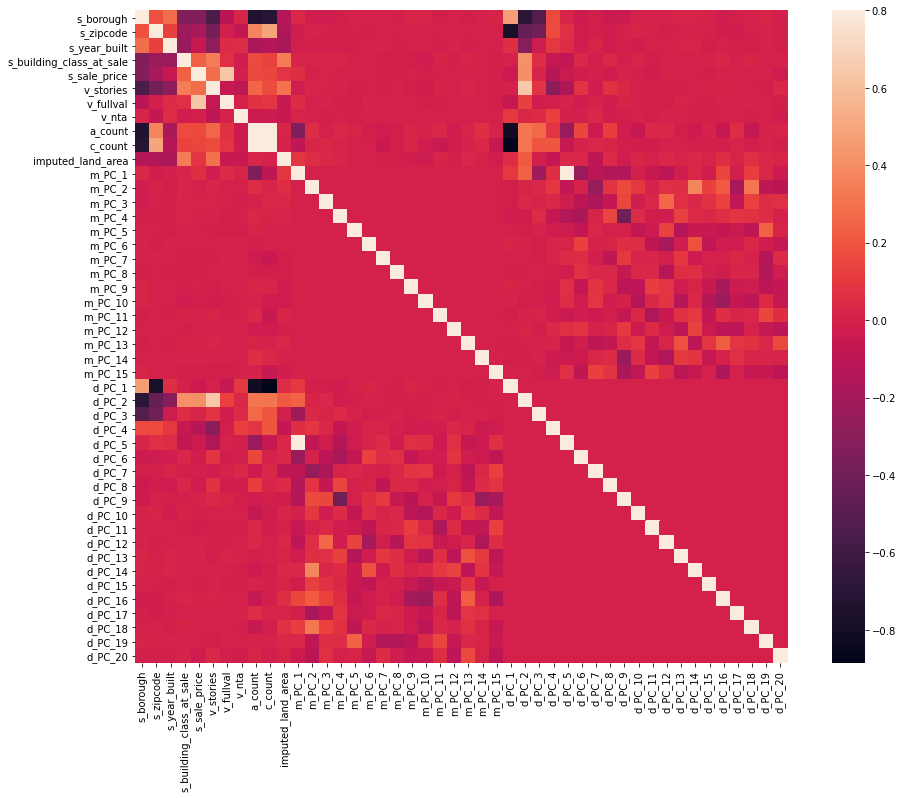

In [26]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr_matrix, vmax=.8, square=True)
fig.savefig('corr_heatmap_125.png')

In [27]:
corr_with_target = corr_matrix['s_sale_price']
print(np.abs(corr_with_target).sort_values(ascending=False).head(20))
print()
print(np.abs(corr_with_target).sort_values(ascending=False).tail(10))

s_sale_price                1.000000
v_fullval                   0.633650
d_PC_2                      0.408903
s_borough                   0.330576
v_stories                   0.286524
s_building_class_at_sale    0.239715
s_zipcode                   0.180761
a_count                     0.160167
c_count                     0.150321
d_PC_4                      0.120316
imputed_land_area           0.085738
m_PC_1                      0.061027
s_year_built                0.056667
d_PC_5                      0.047432
d_PC_1                      0.043424
d_PC_20                     0.033735
d_PC_8                      0.030621
d_PC_11                     0.022367
d_PC_6                      0.019199
d_PC_3                      0.017037
Name: s_sale_price, dtype: float64

m_PC_8     0.004222
d_PC_14    0.003537
d_PC_19    0.002725
m_PC_5     0.002706
m_PC_11    0.002003
m_PC_9     0.001548
m_PC_12    0.000954
d_PC_18    0.000310
m_PC_6     0.000142
m_PC_2     0.000097
Name: s_sale_price, dtyp

In [28]:
k = 20
top_k_corr_features = np.abs(corr_with_target).sort_values(ascending=False).head(k).index.tolist()
print(corr_with_target[top_k_corr_features])

s_sale_price                1.000000
v_fullval                   0.633650
d_PC_2                      0.408903
s_borough                  -0.330576
v_stories                   0.286524
s_building_class_at_sale    0.239715
s_zipcode                  -0.180761
a_count                     0.160167
c_count                     0.150321
d_PC_4                     -0.120316
imputed_land_area           0.085738
m_PC_1                      0.061027
s_year_built               -0.056667
d_PC_5                     -0.047432
d_PC_1                     -0.043424
d_PC_20                    -0.033735
d_PC_8                     -0.030621
d_PC_11                    -0.022367
d_PC_6                     -0.019199
d_PC_3                      0.017037
Name: s_sale_price, dtype: float64


In [29]:
data_narrowed = data[top_k_corr_features]

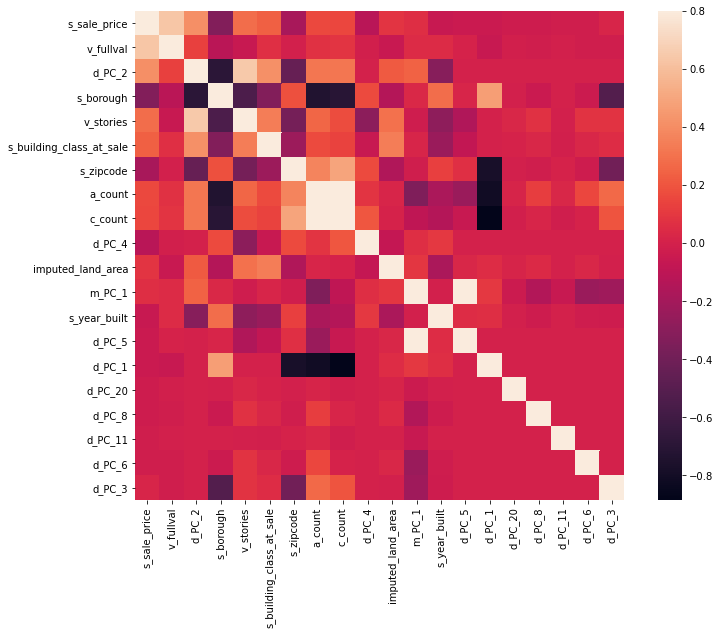

In [30]:
top_k_corr_matrix = data[top_k_corr_features].corr()
fig, ax = plt.subplots(figsize=(12, 9))
corr_heatmap_10 = sns.heatmap(top_k_corr_matrix, vmax=.8, square=True)
fig.savefig('corr_heatmap_10.png')

In [14]:
downsample_samples = random.sample(data_narrowed.index.tolist(), 500)
downsampled_narrow_data = data_narrowed.loc[downsample_samples]

Forward Selection

In [15]:
from sklearn.model_selection import KFold
from sklearn import linear_model


def runXVal_LogLoss(cv, X_sub, Y_tr):
    '''
    Runs LR cross validation with no regularization, returns mean and standard error of mean
    '''
    ll = []; 
    for train_index, test_index in cv.split(X_sub):
        X_tr_f = X_sub.iloc[train_index]
        X_va_f = X_sub.iloc[test_index]
        Y_tr_f = Y_tr.iloc[train_index]
        Y_va_f = Y_tr.iloc[test_index]

        lr = linear_model.LogisticRegression()
        lr.fit(X_tr_f, Y_tr_f)
        P = lr.predict_proba(X_va_f)[:,1]
        
        ll.append(-1*(((Y_va_f==1)*np.log(P)+(Y_va_f==0)*np.log(1-P)).mean()))

    return [np.array(ll).mean(), np.array(ll).std()/np.sqrt(len(ll))]
        
def LrForward_LogLoss(X_tr, Y_tr, cv):
    '''
    Runs cross-validated stepwise selection
    Does not pick the best features, but returns data
    Returns a dictionary that shows at each k: [feature set], x-validated mean, x-validated var 
    For each loop, chooses the feature with best mean+1stderr
    '''
    results = {}
    curr_best = set([])
    cand_list = set(X_tr.columns.values)
    k = 1
    
    while (len(cand_list)>0):
        best_mu = 10**10; best_serr = 10**10; 
        for f in cand_list:
            use_x = list(curr_best)+[f]
            mu, serr = runXVal_LogLoss(cv, X_tr[use_x], Y_tr)
            if ((mu + serr) < (best_mu + best_serr)):
                best_mu = mu
                best_serr = serr
                best_f = f
        curr_best.add(best_f) #Add the best feature to the curr_best_set
        cand_list = cand_list.difference(curr_best) #Remove the best feature from the candidate set
        results[k] = [list(curr_best), best_mu, best_serr]
        k+=1
        
    return results
            

In [16]:
#Run the forward selection
#data_subset = data_narrowed.iloc[0:2000,]
label = 's_sale_price'
cv = KFold(n_splits=10)
r = LrForward_LogLoss(downsampled_narrow_data.drop(label,1), downsampled_narrow_data[label], cv)

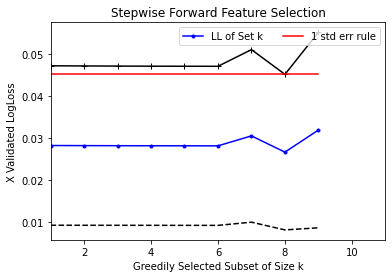

In [17]:
#Now plot the incremental results
ks = []; mus = []; serrs = [];
for i in range(len(r.keys())):
    ks.append(i+1)
    mus.append(r[i+1][1])
    serrs.append(r[i+1][2])

    
best_1serr = min(np.array(mus) + np.array(serrs))
plt.clf()
plt.plot(ks, mus, 'b.-', label = 'LL of Set k')
plt.plot(ks, np.array(mus) + np.array(serrs), 'k+-')
plt.plot(ks, np.array(mus) - np.array(serrs), 'k--')
plt.plot(ks, np.ones(len(ks))*best_1serr, 'r', label ='1 std err rule')

plt.xlim([1,11])

plt.title('Stepwise Forward Feature Selection')
plt.xlabel('Greedily Selected Subset of Size k')
plt.ylabel('X Validated LogLoss')
    
plt.legend(loc=1, ncol=2)
plt.show()

SVD

In [18]:
data_pca = data.copy()
data_pca.drop(["s_sale_date"], axis =1, inplace=True)
# normalize data
data_pca_norm = (data_pca - data_pca.mean()) / data_pca.std()

In [19]:
data_pca

,s_borough,s_zipcode,s_total_units,s_year_built,s_building_class_at_sale,s_sale_price,v_stories,v_fullval,v_latitude,v_longitude,...,d_households_from_100000_to_149999_pct,d_households_from_150000_to_199999,d_households_from_150000_to_199999_pct,d_households_200000_or_more,d_households_200000_or_more_pct,d_median_household_income_dollars,d_mean_household_income_dollars,a_count,c_count,imputed_land_area
0,2,10458.0,1.0,1910.0,10.0,329000,2.0,365000,40.856635,-73.892647,...,0.081,10744.174,0.023,6072.794,0.013,33101,48178,8448,8671,1667.0
1,2,10457.0,2.0,1899.0,29.0,115000,2.0,433000,40.852259,-73.896728,...,0.081,10744.174,0.023,6072.794,0.013,33101,48178,8448,8671,2275.0
2,2,10458.0,3.0,1901.0,32.0,167500,3.0,137000,40.854837,-73.892216,...,0.081,10744.174,0.023,6072.794,0.013,33101,48178,8448,8671,2011.0
3,2,10457.0,3.0,1931.0,3.0,292500,2.0,398000,40.848517,-73.896224,...,0.081,10744.174,0.023,6072.794,0.013,33101,48178,8448,8671,1493.0
4,2,10469.0,1.0,1930.0,9.0,255000,2.0,333000,40.874588,-73.850192,...,0.081,10744.174,0.023,6072.794,0.013,33101,48178,8448,8671,1900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315064,5,10309.0,2.0,2005.0,29.0,890000,2.0,793000,40.533587,-74.204538,...,0.193,20595.243,0.123,18083.628,0.108,82166,101953,936,1866,4000.0
315065,5,10309.0,2.0,2009.0,29.0,1030000,2.0,959000,40.536844,-74.206480,...,0.193,20595.243,0.123,18083.628,0.108,82166,101953,936,1866,4300.0
315066,5,10309.0,2.0,1987.0,12.0,615000,2.0,504000,40.536283,-74.208889,...,0.193,20595.243,0.123,18083.628,0.108,82166,101953,936,1866,2500.0
315067,5,10309.0,2.0,2001.0,29.0,780000,2.0,839000,40.539312,-74.216695,...,0.193,20595.243,0.123,18083.628,0.108,82166,101953,936,1866,5260.0


In [20]:
import numpy as np
from sklearn.decomposition import PCA

# pca = PCA(n_components=50)
# pca.fit(data_scaled)
# PCA
pca = PCA(n_components=50)
#pca.fit_transform(data_pca_norm)

In [21]:
pca.components_

AttributeError: 'PCA' object has no attribute 'components_'

In [ ]:
data_pca.iloc[:, pca.components_[0].argmax()]

In [ ]:
pca.fit(data_pca_norm)
#Get the components from transforming the original data.
scores = pca.transform(data_pca_norm)
# Reconstruct from the 50 dimensional scores 
reconstruct = pca.inverse_transform(scores)
#The residual is the amount not explained by the first 50 components
residual=data_pca_norm-reconstruct

In [ ]:
residual

In [ ]:
# Dump components relations with features:
print(pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2']))

In [ ]:
n_components = 50
pd.DataFrame(pca.transform(data_pca_norm), columns=['PCA%i' % i for i in range(n_components)], index=data_pca_norm.index)

In [ ]:
U, sig, Vt = np.linalg.svd(data_narrowed)

In [ ]:
plt.plot(np.cumsum(sig**2)/np.sum(sig**2))
plt.show()